In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_char = cv2.imread('data/000000.jpg')
image = image_char.astype(np.float32) / 255.0
image_orig = image.copy()
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [2]:
import math
def normalize_angle(value, width):
    return value + np.ceil(-value/width)*width

In [3]:
def show(image_bgr, title=''):
    image_rgb = (cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)*255).astype(np.uint8)
    plt.figure()
    plt.imshow(image_rgb)
    if title:
        plt.title(title)
    plt.show()

In [4]:
assert normalize_angle(10, 180) == 10
assert normalize_angle(180, 180) == 0
assert normalize_angle(181, 180) == 1
assert normalize_angle(-90, 180) == 90
assert normalize_angle(-1, 180) == 179

In [5]:
def smoothstep(edge0, edge1, x):
    # follows GLSL definition
    t = np.clip((x - edge0) / (edge1 - edge0), 0.0, 1.0)
    return t*t*(3.0 - 2.0*t)

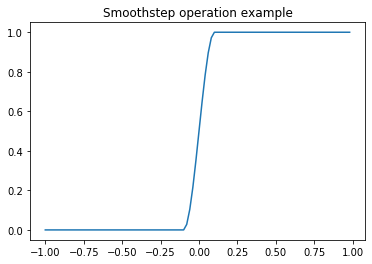

In [6]:
plt.figure()
X = np.arange(-1.0, 1.0, 0.02)
Y = smoothstep(-0.1, 0.1, X)
plt.plot(X, Y)
plt.title('Smoothstep operation example')
plt.show()

In [7]:
def get_smooth_region(x, range_start, range_end, eps=0.5):
    return np.minimum(
        smoothstep(range_start-eps, range_start, x),
        smoothstep(-range_end-eps, -range_end, -x))

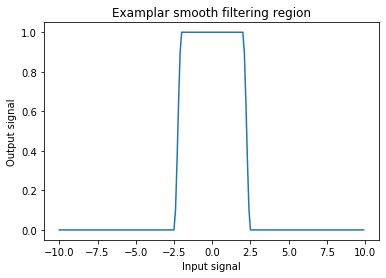

In [17]:
plt.figure()

RADIUS_HUE = 2
CENTER_HUE = 0

X = np.arange(-10, 10, 0.1)
Y = get_smooth_region(X, CENTER_HUE - RADIUS_HUE, CENTER_HUE + RADIUS_HUE)

plt.plot(X, Y)
plt.title('Examplar smooth filtering region')
plt.xlabel('Input signal')
plt.ylabel('Output signal')
plt.show()

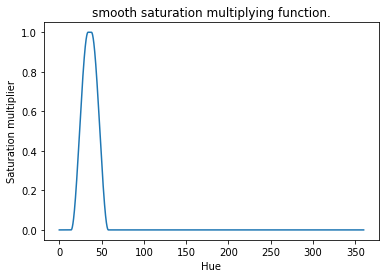

In [198]:
plt.figure()

RADIUS_HUE = 1.0
CENTER_HUE = 18
EPS = 10.0

X = np.arange(0, 360, 0.1)
Y = get_smooth_region(
    normalize_angle(X/2-CENTER_HUE+90, 180), 
    -RADIUS_HUE+90, 
    RADIUS_HUE+90, 
    eps=EPS)

plt.plot(X, Y)
plt.title('smooth saturation multiplying function.')
plt.xlabel('Hue')
plt.ylabel('Saturation multiplier')
plt.show()

In [199]:
image_h = cv2.bilateralFilter(image_hsv[:,:,0], -1, 10, 15)
region_reject = get_smooth_region(
    normalize_angle(image_h-CENTER_HUE+90, 180),
    -RADIUS_HUE+90,
    RADIUS_HUE+90,
    eps=EPS)

image_splash = image_hsv.copy()
image_splash[:,:,1] *= region_reject

image_nosat = image_hsv.copy()
image_nosat[:,:,1] = 0

In [200]:
image_nosat_bgr = cv2.cvtColor(image_nosat, cv2.COLOR_HSV2BGR)
image_splash_bgr = cv2.cvtColor(image_splash, cv2.COLOR_HSV2BGR)
image_eliminated = np.ones(image_orig.shape, dtype=image_orig.dtype)
image_eliminated[:,:,0] = 1 - region_reject
image_eliminated[:,:,1] = 1 - region_reject
image_eliminated[:,:,2] = 1 - region_reject

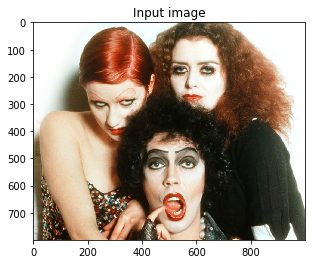

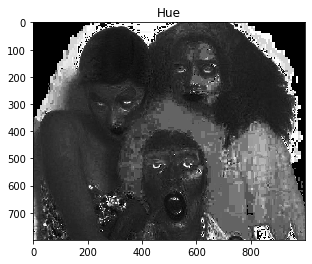

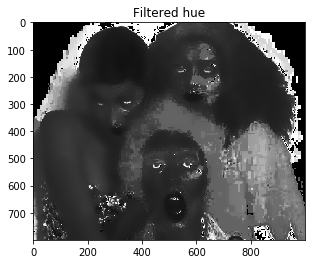

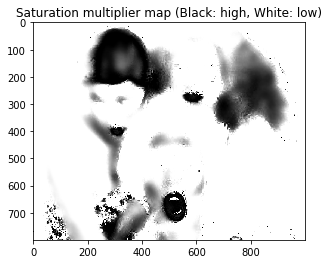

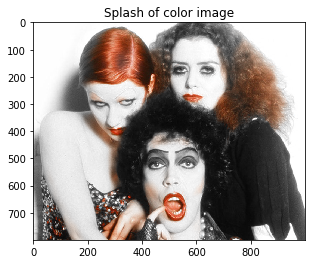

In [201]:
show(image_orig, "Input image")
show(image_hsv[:,:,0]/180, "Hue")
show(image_h/180, "Filtered hue")
show(image_eliminated, "Saturation multiplier map (Black: high, White: low)")
show(image_splash_bgr, "Splash of color image")